# Network attacks - Detection

## I - Modules

In [31]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score,recall_score,roc_curve,roc_auc_score,ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import numpy as np

## II - Charger donnée

Utilisons donnée préparée :

In [32]:
def load_data(size):
    if size=="full":
        df_normal = pd.read_csv("preparation/network_normal.csv")
        df_attack_1 = pd.read_csv("preparation/network_1.csv")
        df_attack_2 = pd.read_csv("preparation/network_2.csv")
        df_attack_3 = pd.read_csv("preparation/network_3.csv")
        df_attack_4 = pd.read_csv("preparation/network_4.csv")
    
    elif size=="/2":
        df_normal = pd.read_csv("preparation/network_normal.csv", skiprows=lambda x: x % 2 != 0)
        df_attack_1 = pd.read_csv("preparation/network_1.csv", skiprows=lambda x: x % 2 != 0)
        df_attack_2 = pd.read_csv("preparation/network_2.csv", skiprows=lambda x: x % 2 != 0)
        df_attack_3 = pd.read_csv("preparation/network_3.csv", skiprows=lambda x: x % 2 != 0)
        df_attack_4 = pd.read_csv("preparation/network_4.csv", skiprows=lambda x: x % 2 != 0)
    
    elif size=="/4":
        df_normal = pd.read_csv("preparation/network_normal.csv", skiprows=lambda x: x % 4 != 0)
        df_attack_1 = pd.read_csv("preparation/network_1.csv", skiprows=lambda x: x % 4 != 0)
        df_attack_2 = pd.read_csv("preparation/network_2.csv", skiprows=lambda x: x % 4 != 0)
        df_attack_3 = pd.read_csv("preparation/network_3.csv", skiprows=lambda x: x % 4 != 0)
        df_attack_4 = pd.read_csv("preparation/network_4.csv", skiprows=lambda x: x % 4 != 0)
    
    elif size=="/10":
        df_normal = pd.read_csv("preparation/network_normal.csv", skiprows=lambda x: x % 10 != 0)
        df_attack_1 = pd.read_csv("preparation/network_1.csv", skiprows=lambda x: x % 10 != 0)
        df_attack_2 = pd.read_csv("preparation/network_2.csv", skiprows=lambda x: x % 10 != 0)
        df_attack_3 = pd.read_csv("preparation/network_3.csv", skiprows=lambda x: x % 10 != 0)
        df_attack_4 = pd.read_csv("preparation/network_4.csv", skiprows=lambda x: x % 10 != 0)
    
    return df_normal, df_attack_1, df_attack_2, df_attack_3, df_attack_4

In [33]:
df_normal, df_attack_1, df_attack_2, df_attack_3, df_attack_4 = load_data("/10")

## III - Fonctions

### 1 - Matrice de confusion

In [34]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix



import os

def plot_confusion_matrix(y_preds, y_true, labels, save_cof_mat=False, conf_mat_name="conf_mat", model_name="model"):
    cm = confusion_matrix(y_true, y_preds,normalize="true")
    fig, ax = plt.subplots(figsize=(6, 6))

    labels_for_fig = [(l[0:4]+'.' if isinstance(l, str) else str(l)) for l in labels]
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=labels_for_fig)
    try:
        disp.plot(cmap="Blues", values_format="4f", ax=ax, colorbar=False)

        if save_cof_mat:
            # Create the folder if it doesn't exist
            folder_path = f"./images/network/Results/{model_name}/Confusion_matrix"
            if not os.path.exists(folder_path):
                os.makedirs(folder_path)

            plt.savefig(f"{folder_path}/{conf_mat_name}.png")
    except:
        print("Error")
        print(pd.unique(y_preds))
        print(pd.unique(y_true))
        print(labels)
    plt.title("Normalized confusion matrix")
    plt.show()



def eval_model(y_pred, y_test, labels, save_cof_mat=False, conf_mat_name="conf_mat", model_name="model"):
    plot_confusion_matrix(list(y_pred), list(y_test), labels, save_cof_mat, conf_mat_name, model_name)

    print(classification_report(y_test, y_pred))
    
    # Print the confusion matrix directly
    cm = confusion_matrix(y_test, y_pred, labels=labels)
    
    # Compute and print metrics for each class
    for i, label in enumerate(labels):
        tp = cm[i, i]
        fp = cm[:, i].sum() - tp
        fn = cm[i, :].sum() - tp
        tn = cm.sum() - (tp + fp + fn)

        # print("tp", tp)
        # print("fp", fp)
        # print("fn", fn)
        # print("tn", tn)
        
        tnr = tn / (tn + fp)  # True negative rate
        tpr = tp / (tp + fn)  # True positive rate
        fnr = fn / (fn + tp)  # False negative rate
        fpr = fp / (fp + tn)  # False positive rate

        
        
        print(f"\nMetrics for class {label}:")
        print(f"True negative rate: {tnr:.4f}")
        print(f"True positive rate: {tpr:.4f}")
        print(f"False negative rate: {fnr:.4f}")
        print(f"False positive rate: {fpr:.4f}")
    
    
    

### 2 - KNN

In [35]:
def KNN_attack_detection(df, name_df="xxx", model_name="xxx"):
    new_df = df.copy()
    print("taille",len(df))
    X = new_df.drop('label', axis=1)  # Caractéristiques
    y = new_df['label']  # Cible
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    k = len(pd.unique(y_test))
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)


    y_pred = knn_model.predict(X_test)
    eval_model(y_pred, y_test, knn_model.classes_, True, name_df, model_name)

### 3 - Random Forest

In [36]:
# Import the model we are using
# Instantiate model with 1000 decision trees


from sklearn.ensemble import RandomForestClassifier

def randomForest_attack_detector(df, name_df="xxx", model_name="xxx"):
    new_df = df.copy()
    n = 0
    labels = pd.unique(new_df["label"])
    mapping = {}
    for label in labels:
        mapping[label] = n
        n += 1

    new_df["label"] = new_df["label"].map(mapping)
    
    X = new_df.drop('label', axis=1)  # Features
    y = new_df['label']  # Target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

    rf = RandomForestClassifier(n_estimators=20, random_state=42)
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_test)
    eval_model(y_pred, y_test, rf.classes_, True, name_df, model_name)

## IV - Detection

### 1 - KNN



df_attack_1
taille 55267


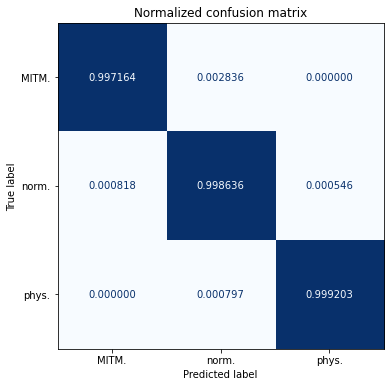

                precision    recall  f1-score   support

          MITM       1.00      1.00      1.00      2468
        normal       1.00      1.00      1.00      7332
physical fault       1.00      1.00      1.00      1254

      accuracy                           1.00     11054
     macro avg       1.00      1.00      1.00     11054
  weighted avg       1.00      1.00      1.00     11054


Metrics for class MITM:
True negative rate: 0.9993
True positive rate: 0.9972
False negative rate: 0.0028
False positive rate: 0.0007

Metrics for class normal:
True negative rate: 0.9979
True positive rate: 0.9986
False negative rate: 0.0014
False positive rate: 0.0021

Metrics for class physical fault:
True negative rate: 0.9996
True positive rate: 0.9992
False negative rate: 0.0008
False positive rate: 0.0004


df_attack_2
taille 47736
Error
['physical fault' 'normal' 'DoS' 'MITM']
['physical fault' 'normal' 'DoS' 'MITM' 'scan']
['DoS' 'MITM' 'normal' 'physical fault']


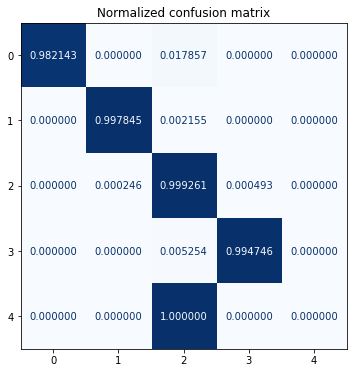

/home/orfeu/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/orfeu/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/orfeu/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                precision    recall  f1-score   support

           DoS       1.00      0.98      0.99       392
          MITM       1.00      1.00      1.00       464
        normal       1.00      1.00      1.00      8120
physical fault       0.99      0.99      0.99       571
          scan       0.00      0.00      0.00         1

      accuracy                           1.00      9548
     macro avg       0.80      0.79      0.80      9548
  weighted avg       1.00      1.00      1.00      9548


Metrics for class DoS:
True negative rate: 1.0000
True positive rate: 0.9821
False negative rate: 0.0179
False positive rate: 0.0000

Metrics for class MITM:
True negative rate: 0.9998
True positive rate: 0.9978
False negative rate: 0.0022
False positive rate: 0.0002

Metrics for class normal:
True negative rate: 0.9923
True positive rate: 0.9993
False negative rate: 0.0007
False positive rate: 0.0077

Metrics for class physical fault:
True negative rate: 0.9996
True positive rate: 0.994

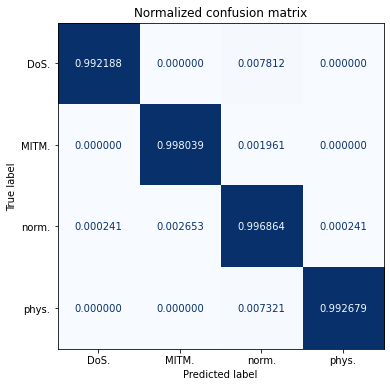

                precision    recall  f1-score   support

           DoS       1.00      0.99      0.99       256
          MITM       0.98      1.00      0.99       510
        normal       1.00      1.00      1.00      4146
physical fault       1.00      0.99      1.00       683

      accuracy                           1.00      5595
     macro avg       0.99      0.99      0.99      5595
  weighted avg       1.00      1.00      1.00      5595


Metrics for class DoS:
True negative rate: 0.9998
True positive rate: 0.9922
False negative rate: 0.0078
False positive rate: 0.0002

Metrics for class MITM:
True negative rate: 0.9978
True positive rate: 0.9980
False negative rate: 0.0020
False positive rate: 0.0022

Metrics for class normal:
True negative rate: 0.9945
True positive rate: 0.9969
False negative rate: 0.0031
False positive rate: 0.0055

Metrics for class physical fault:
True negative rate: 0.9998
True positive rate: 0.9927
False negative rate: 0.0073
False positive rate: 0.000

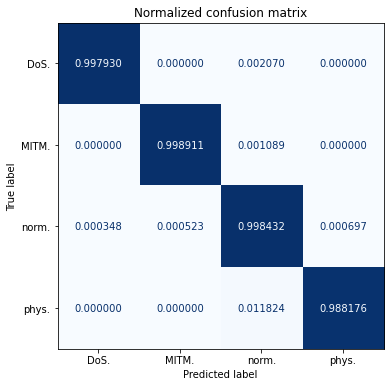

                precision    recall  f1-score   support

           DoS       1.00      1.00      1.00      1449
          MITM       1.00      1.00      1.00       918
        normal       1.00      1.00      1.00      5740
physical fault       0.99      0.99      0.99       592

      accuracy                           1.00      8699
     macro avg       1.00      1.00      1.00      8699
  weighted avg       1.00      1.00      1.00      8699


Metrics for class DoS:
True negative rate: 0.9997
True positive rate: 0.9979
False negative rate: 0.0021
False positive rate: 0.0003

Metrics for class MITM:
True negative rate: 0.9996
True positive rate: 0.9989
False negative rate: 0.0011
False positive rate: 0.0004

Metrics for class normal:
True negative rate: 0.9963
True positive rate: 0.9984
False negative rate: 0.0016
False positive rate: 0.0037

Metrics for class physical fault:
True negative rate: 0.9995
True positive rate: 0.9882
False negative rate: 0.0118
False positive rate: 0.000

In [37]:
dataframes = [df_attack_1, df_attack_2, df_attack_3, df_attack_4]
dataframes_name = ['df_attack_1', 'df_attack_2', 'df_attack_3', 'df_attack_4']

i=0
for df in dataframes:
    print("\n\n\033[1;33m" + dataframes_name[i] + "\033[0m")
    KNN_attack_detection(df, dataframes_name[i] + "_conf_mat", "KNN")
    i+=1

taille 174467
Error
['normal' 'physical fault' 'DoS' 'MITM']
['normal' 'physical fault' 'DoS' 'MITM']
['DoS' 'MITM' 'normal' 'physical fault' 'scan']


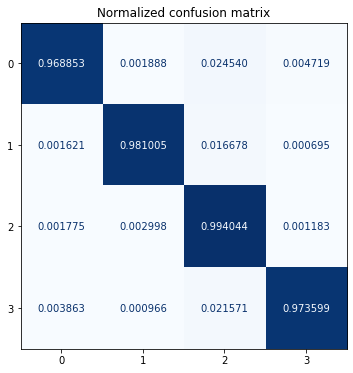

                precision    recall  f1-score   support

           DoS       0.97      0.97      0.97      2119
          MITM       0.98      0.98      0.98      4317
        normal       0.99      0.99      0.99     25352
physical fault       0.99      0.97      0.98      3106

      accuracy                           0.99     34894
     macro avg       0.98      0.98      0.98     34894
  weighted avg       0.99      0.99      0.99     34894


Metrics for class DoS:
True negative rate: 0.9980
True positive rate: 0.9689
False negative rate: 0.0311
False positive rate: 0.0020

Metrics for class MITM:
True negative rate: 0.9973
True positive rate: 0.9810
False negative rate: 0.0190
False positive rate: 0.0027

Metrics for class normal:
True negative rate: 0.9800
True positive rate: 0.9940
False negative rate: 0.0060
False positive rate: 0.0200

Metrics for class physical fault:
True negative rate: 0.9986
True positive rate: 0.9736
False negative rate: 0.0264
False positive rate: 0.001

/tmp/ipykernel_9179/3715094280.py:56: RuntimeWarning: invalid value encountered in long_scalars
  tpr = tp / (tp + fn)  # True positive rate
/tmp/ipykernel_9179/3715094280.py:57: RuntimeWarning: invalid value encountered in long_scalars
  fnr = fn / (fn + tp)  # False negative rate


In [38]:
KNN_attack_detection(pd.concat([df_attack_1,df_attack_2,df_attack_3,df_attack_4]),"all_attacks_conf_mat", "KNN")

taille 252039
Error
['normal' 'physical fault' 'MITM' 'DoS']
['normal' 'physical fault' 'MITM' 'DoS']
['DoS' 'MITM' 'normal' 'physical fault' 'scan']


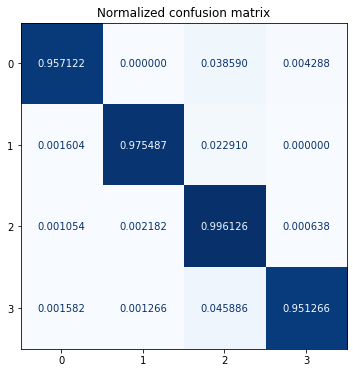

                precision    recall  f1-score   support

           DoS       0.97      0.96      0.97      2099
          MITM       0.98      0.98      0.98      4365
        normal       0.99      1.00      0.99     40784
physical fault       0.99      0.95      0.97      3160

      accuracy                           0.99     50408
     macro avg       0.98      0.97      0.98     50408
  weighted avg       0.99      0.99      0.99     50408


Metrics for class DoS:
True negative rate: 0.9989
True positive rate: 0.9571
False negative rate: 0.0429
False positive rate: 0.0011

Metrics for class MITM:
True negative rate: 0.9980
True positive rate: 0.9755
False negative rate: 0.0245
False positive rate: 0.0020

Metrics for class normal:
True negative rate: 0.9661
True positive rate: 0.9961
False negative rate: 0.0039
False positive rate: 0.0339

Metrics for class physical fault:
True negative rate: 0.9993
True positive rate: 0.9513
False negative rate: 0.0487
False positive rate: 0.000

/tmp/ipykernel_9179/3715094280.py:56: RuntimeWarning: invalid value encountered in long_scalars
  tpr = tp / (tp + fn)  # True positive rate
/tmp/ipykernel_9179/3715094280.py:57: RuntimeWarning: invalid value encountered in long_scalars
  fnr = fn / (fn + tp)  # False negative rate


In [39]:
KNN_attack_detection(pd.concat([df_normal,df_attack_1,df_attack_2,df_attack_3,df_attack_4]), "all_attack_&_normal_conf_mat", "KNN")

### 2 - Random forest



df_attack_1


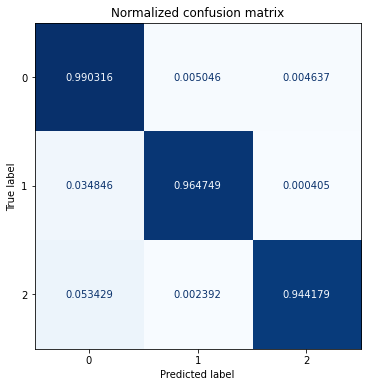

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      7332
           1       0.98      0.96      0.97      2468
           2       0.97      0.94      0.96      1254

    accuracy                           0.98     11054
   macro avg       0.98      0.97      0.97     11054
weighted avg       0.98      0.98      0.98     11054


Metrics for class 0:
True negative rate: 0.9589
True positive rate: 0.9903
False negative rate: 0.0097
False positive rate: 0.0411

Metrics for class 1:
True negative rate: 0.9953
True positive rate: 0.9647
False negative rate: 0.0353
False positive rate: 0.0047

Metrics for class 2:
True negative rate: 0.9964
True positive rate: 0.9442
False negative rate: 0.0558
False positive rate: 0.0036


df_attack_2
Error
[3 0 2 4]
[3 0 2 4 1]
[0 2 3 4]


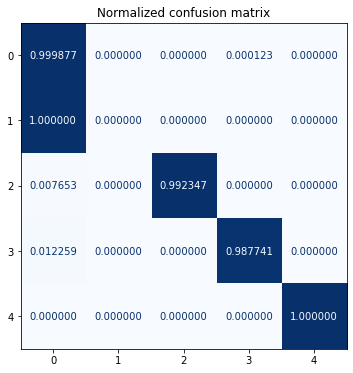

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8120
           1       0.00      0.00      0.00         1
           2       1.00      0.99      1.00       392
           3       1.00      0.99      0.99       571
           4       1.00      1.00      1.00       464

    accuracy                           1.00      9548
   macro avg       0.80      0.80      0.80      9548
weighted avg       1.00      1.00      1.00      9548


Metrics for class 0:
True negative rate: 0.9930
True positive rate: 0.9999
False negative rate: 0.0001
False positive rate: 0.0070

Metrics for class 2:
True negative rate: 1.0000
True positive rate: 0.9923
False negative rate: 0.0077
False positive rate: 0.0000

Metrics for class 3:
True negative rate: 0.9999
True positive rate: 0.9877
False negative rate: 0.0123
False positive rate: 0.0001

Metrics for class 4:
True negative rate: 1.0000
True positive rate: 1.0000
False negative rate: 0.0000
False posit

/home/orfeu/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/orfeu/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/orfeu/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


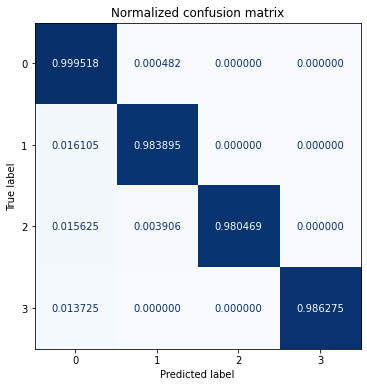

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4146
           1       1.00      0.98      0.99       683
           2       1.00      0.98      0.99       256
           3       1.00      0.99      0.99       510

    accuracy                           1.00      5595
   macro avg       1.00      0.99      0.99      5595
weighted avg       1.00      1.00      1.00      5595


Metrics for class 0:
True negative rate: 0.9848
True positive rate: 0.9995
False negative rate: 0.0005
False positive rate: 0.0152

Metrics for class 1:
True negative rate: 0.9994
True positive rate: 0.9839
False negative rate: 0.0161
False positive rate: 0.0006

Metrics for class 2:
True negative rate: 1.0000
True positive rate: 0.9805
False negative rate: 0.0195
False positive rate: 0.0000

Metrics for class 3:
True negative rate: 1.0000
True positive rate: 0.9863
False negative rate: 0.0137
False positive rate: 0.0000


df_attack_4


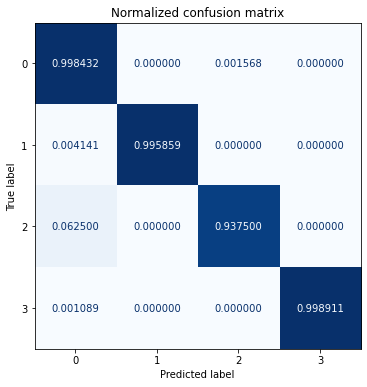

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5740
           1       1.00      1.00      1.00      1449
           2       0.98      0.94      0.96       592
           3       1.00      1.00      1.00       918

    accuracy                           0.99      8699
   macro avg       0.99      0.98      0.99      8699
weighted avg       0.99      0.99      0.99      8699


Metrics for class 0:
True negative rate: 0.9851
True positive rate: 0.9984
False negative rate: 0.0016
False positive rate: 0.0149

Metrics for class 1:
True negative rate: 1.0000
True positive rate: 0.9959
False negative rate: 0.0041
False positive rate: 0.0000

Metrics for class 2:
True negative rate: 0.9989
True positive rate: 0.9375
False negative rate: 0.0625
False positive rate: 0.0011

Metrics for class 3:
True negative rate: 1.0000
True positive rate: 0.9989
False negative rate: 0.0011
False positive rate: 0.0000


In [40]:
dataframes = [df_attack_1, df_attack_2, df_attack_3, df_attack_4]
dataframes_name = ['df_attack_1', 'df_attack_2', 'df_attack_3', 'df_attack_4']

i=0
for df in dataframes:
    print("\n\n\033[1;33m" + dataframes_name[i] + "\033[0m")
    randomForest_attack_detector(df, dataframes_name[i] + "_conf_mat", "Random_forest")
    i+=1

Error
[0 2 1 4]
[0 2 1 4]
[0 1 2 3 4]


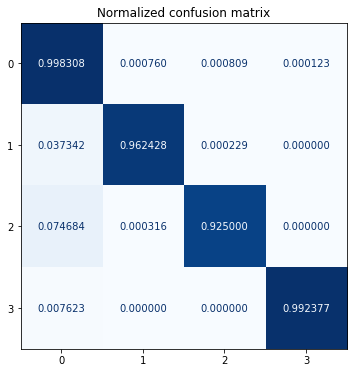

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     40784
           1       0.99      0.96      0.98      4365
           2       0.99      0.93      0.96      3160
           4       1.00      0.99      0.99      2099

    accuracy                           0.99     50408
   macro avg       0.99      0.97      0.98     50408
weighted avg       0.99      0.99      0.99     50408


Metrics for class 0:
True negative rate: 0.9569
True positive rate: 0.9983
False negative rate: 0.0017
False positive rate: 0.0431

Metrics for class 1:
True negative rate: 0.9993
True positive rate: 0.9624
False negative rate: 0.0376
False positive rate: 0.0007

Metrics for class 2:
True negative rate: 0.9993
True positive rate: 0.9250
False negative rate: 0.0750
False positive rate: 0.0007

Metrics for class 3:
True negative rate: 1.0000
True positive rate: nan
False negative rate: nan
False positive rate: 0.0000

Metrics for class 4:
True negative rate: 0

/tmp/ipykernel_9179/3715094280.py:56: RuntimeWarning: invalid value encountered in long_scalars
  tpr = tp / (tp + fn)  # True positive rate
/tmp/ipykernel_9179/3715094280.py:57: RuntimeWarning: invalid value encountered in long_scalars
  fnr = fn / (fn + tp)  # False negative rate


In [41]:
randomForest_attack_detector(pd.concat([df_normal,df_attack_1,df_attack_2,df_attack_3,df_attack_4]), "all_attack_conf_mat", "Random_forest")

Error
[0 2 1 4]
[0 2 1 4]
[0 1 2 3 4]


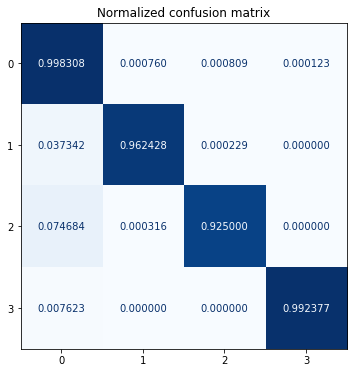

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     40784
           1       0.99      0.96      0.98      4365
           2       0.99      0.93      0.96      3160
           4       1.00      0.99      0.99      2099

    accuracy                           0.99     50408
   macro avg       0.99      0.97      0.98     50408
weighted avg       0.99      0.99      0.99     50408


Metrics for class 0:
True negative rate: 0.9569
True positive rate: 0.9983
False negative rate: 0.0017
False positive rate: 0.0431

Metrics for class 1:
True negative rate: 0.9993
True positive rate: 0.9624
False negative rate: 0.0376
False positive rate: 0.0007

Metrics for class 2:
True negative rate: 0.9993
True positive rate: 0.9250
False negative rate: 0.0750
False positive rate: 0.0007

Metrics for class 3:
True negative rate: 1.0000
True positive rate: nan
False negative rate: nan
False positive rate: 0.0000

Metrics for class 4:
True negative rate: 0

/tmp/ipykernel_9179/3715094280.py:56: RuntimeWarning: invalid value encountered in long_scalars
  tpr = tp / (tp + fn)  # True positive rate
/tmp/ipykernel_9179/3715094280.py:57: RuntimeWarning: invalid value encountered in long_scalars
  fnr = fn / (fn + tp)  # False negative rate


In [42]:
randomForest_attack_detector(pd.concat([df_normal,df_attack_1,df_attack_2,df_attack_3,df_attack_4]), "all_attack_&_normal_conf_mat", "Random_forest")